In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

(0.16666666666666669, 0.2946278254943948)

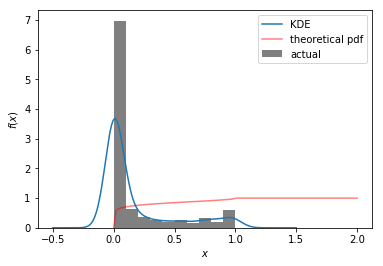

In [9]:
a = 0.1
b = 0.5
beta_rv = sts.beta(a, b)
sample_beta = beta_rv.rvs(1000)
 
x = np.linspace(0,2,100)
pdf = beta_rv.cdf(x)
 
df = pd.DataFrame(sample_beta, columns=['KDE'])
ax = df.plot(kind='density')
 
plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)
plt.hist(sample_beta,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


MU = a/(a+b)
VAR = (a*b)/(((a+b)**2)*(a+b+1))
SIGMA = math.sqrt(VAR)
MU, SIGMA

MU vs mu: 0.17 vs 0.18
Interval of 95% = 0.18 +/- 0.26


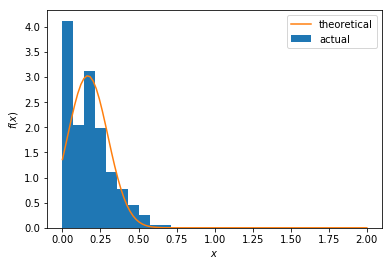

MU vs mu: 0.17 vs 0.17
Interval of 95% = 0.17 +/- 0.19


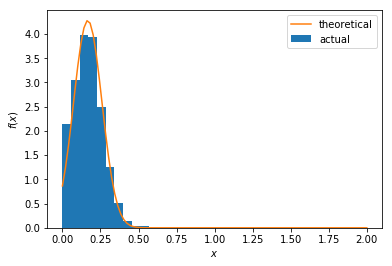

MU vs mu: 0.17 vs 0.17
Interval of 95% = 0.17 +/- 0.06


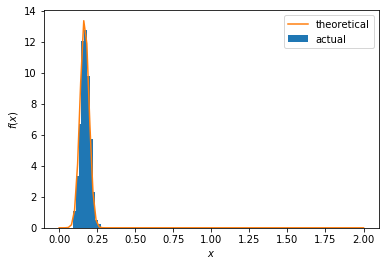

MU vs mu: 0.17 vs 0.17
Interval of 95% = 0.17 +/- 0.02


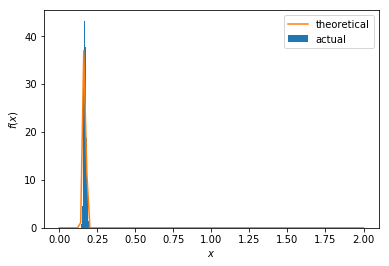

In [22]:
def clt(sample,sub_sample_size, n_sub_samples=1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0,len(sample),sub_sample_size)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = SIGMA/math.sqrt(sub_sample_size)
    
    norm_rv = sts.norm(MU,SE)
    
    print('MU vs mu: {:.2f} vs {:.2f}'.format(MU,mu))
    print('Interval of 95% = {:.2f} +/- {:.2f}'.format(mu,2*SE))
    
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()
    
clt(sample_beta,5)
clt(sample_beta,10)
clt(sample_beta,100)
clt(sample_beta,1000)
